## Fifa data analysis usining pandas and Matplotlib

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [56]:
df = pd.read_csv('fifa_data.csv')
df.head()

,Unnamed: 0,ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,...,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause
0,0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,...,96.0,33.0,28.0,26.0,6.0,11.0,15.0,14.0,8.0,€226.5M
1,1,20801,Cristiano Ronaldo,33,https://cdn.sofifa.org/players/4/19/20801.png,Portugal,https://cdn.sofifa.org/flags/38.png,94,94,Juventus,...,95.0,28.0,31.0,23.0,7.0,11.0,15.0,14.0,11.0,€127.1M
2,2,190871,Neymar Jr,26,https://cdn.sofifa.org/players/4/19/190871.png,Brazil,https://cdn.sofifa.org/flags/54.png,92,93,Paris Saint-Germain,...,94.0,27.0,24.0,33.0,9.0,9.0,15.0,15.0,11.0,€228.1M
3,3,193080,De Gea,27,https://cdn.sofifa.org/players/4/19/193080.png,Spain,https://cdn.sofifa.org/flags/45.png,91,93,Manchester United,...,68.0,15.0,21.0,13.0,90.0,85.0,87.0,88.0,94.0,€138.6M
4,4,192985,K. De Bruyne,27,https://cdn.sofifa.org/players/4/19/192985.png,Belgium,https://cdn.sofifa.org/flags/7.png,91,92,Manchester City,...,88.0,68.0,58.0,51.0,15.0,13.0,5.0,10.0,13.0,€196.4M


In [57]:
df.shape

(18207, 89)

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18207 entries, 0 to 18206
Data columns (total 89 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                18207 non-null  int64  
 1   ID                        18207 non-null  int64  
 2   Name                      18207 non-null  object 
 3   Age                       18207 non-null  int64  
 4   Photo                     18207 non-null  object 
 5   Nationality               18207 non-null  object 
 6   Flag                      18207 non-null  object 
 7   Overall                   18207 non-null  int64  
 8   Potential                 18207 non-null  int64  
 9   Club                      17966 non-null  object 
 10  Club Logo                 18207 non-null  object 
 11  Value                     18207 non-null  object 
 12  Wage                      18207 non-null  object 
 13  Special                   18207 non-null  int64  
 14  Prefer

### Data Preprocessing

In [59]:
df = df.drop(columns = ['Unnamed: 0' , 'Photo', 'Flag' , 'Club Logo' , 'Jersey Number'], axis=1)

In [60]:
df.shape

(18207, 84)

In [61]:
# df['Value'][0][1:-1]
# df['Value'][0][-1]
def value_conv(val):
    try:
        value = float(val[1:-1])
        suffix = val[-1]
        if suffix == 'M':
            value = value * 1000000
        elif suffix == 'K':
            value = value* 1000
    except ValueError:
        value = 0
    return value
        
        

In [62]:
df['Value'] = df['Value'].apply(value_conv)

In [63]:
df['Wage'] = df['Wage'].apply(value_conv)

In [64]:
# df['Value'].value_counts()
df[['Value', 'Wage']]

,Value,Wage
0,110500000.0,565000.0
1,77000000.0,405000.0
2,118500000.0,290000.0
3,72000000.0,260000.0
4,102000000.0,355000.0
...,...,...
18202,60000.0,1000.0
18203,60000.0,1000.0
18204,60000.0,1000.0
18205,60000.0,1000.0


In [65]:
# removing lbs and than converting to kg
df['Weight'] = [round(int(x.strip('lbs'))*0.45359237) if x==str(x) else x for x in df['Weight']]

## Ploting with matplotlib

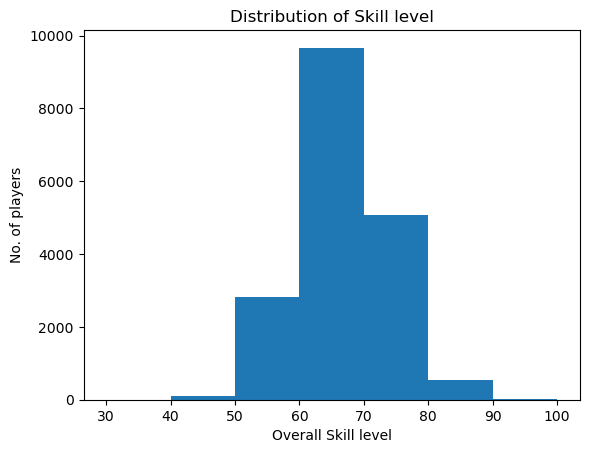

In [66]:
plt.hist(df.Overall, bins =[30,40,50,60,70,80,90,100])
plt.title('Distribution of Skill level')
plt.xlabel('Overall Skill level')
plt.ylabel('No. of players')
plt.show()

In [67]:
name = df['Name'][0:10]
name
# plt.bar(name, height= df['Overall'][0:10])
# # plt.yticks([70,75,80,85,90,95,100])
# plt.xticks(rotation=90)
# plt.title('Top 10 players with overall skill level')
# plt.show()

0             L. Messi
1    Cristiano Ronaldo
2            Neymar Jr
3               De Gea
4         K. De Bruyne
5            E. Hazard
6            L. Modrić
7            L. Suárez
8         Sergio Ramos
9             J. Oblak
Name: Name, dtype: object

In [68]:
left = df[df['Preferred Foot'] == 'Left'].count()[0]
right = df[df['Preferred Foot'] == 'Right'].count()[0]


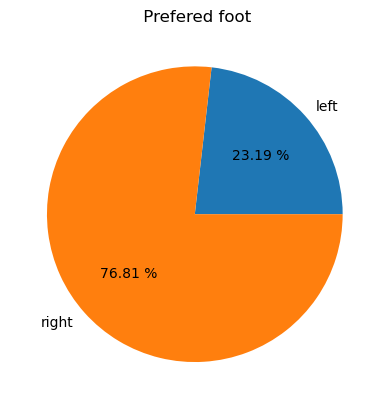

In [69]:
lab = ['left', 'right']
plt.pie([left, right], labels=lab , autopct='%.2f %%' )
plt.title(' Prefered foot')
plt.show()

In [70]:
# #Aternative
# Weight = ([int(x.strip('lbs')) if x==str(x) else x for x in df['Weight']]
# #deleting the NaN values in list
# del weight[13236:13284]
# # weight in kg
# kg_weight = []
# for i in weight:
#     i= i*0.45359237
#     kg_weight.append(round(i))
    
# kg_weight

In [71]:
df['Weight']

0        72.0
1        83.0
2        68.0
3        76.0
4        70.0
         ... 
18202    61.0
18203    77.0
18204    67.0
18205    70.0
18206    80.0
Name: Weight, Length: 18207, dtype: float64

In [72]:
df['Weight'].describe()

count    18159.000000
mean        75.289003
std          7.075511
min         50.000000
25%         70.000000
50%         75.000000
75%         80.000000
max        110.000000
Name: Weight, dtype: float64

In [73]:
light = df.loc[df['Weight']<=60].count()[0]
light_medium = df.loc[(df['Weight']>60) & (df['Weight']<=70)].count()[0]
medium = df.loc[(df['Weight']>70) & (df['Weight']<=90)].count()[0]
medium_heavy = df.loc[(df['Weight']>90) & (df['Weight']<100)].count()[0]
heavy = df.loc[df['Weight']>=100].count()[0]

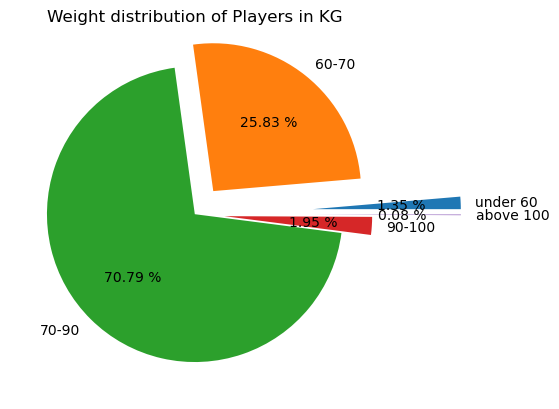

In [74]:
label = ['under 60', '60-70', '70-90', '90-100', 'above 100']
expl = [.8,.2,0,.2,.8]
plt.pie([light, light_medium, medium, medium_heavy, heavy], autopct='%.2f %%', labels=label, explode= expl)
plt.title('Weight distribution of Players in KG')
plt.show()

In [75]:
# Top five Clubs with lowest Wages
df.groupby('Club')['Wage'].sum().sort_values()[:5]

Club
Sligo Rovers       19000.0
Derry City         19000.0
Limerick FC        19000.0
Shamrock Rovers    22000.0
Dalkurd FF         22000.0
Name: Wage, dtype: float64

In [76]:
# Top Five clubs with Heighst wages
High_wage= df.groupby('Club')['Wage'].sum().sort_values(ascending = False)[:5]
High_wage

Club
Real Madrid          5017000.0
FC Barcelona         4837000.0
Manchester City      3741000.0
Manchester United    3391000.0
Juventus             3292000.0
Name: Wage, dtype: float64

In [77]:
madrid = df.loc[df['Club'] == 'Real Madrid']['Overall']
barclona = df.loc[df['Club'] == 'FC Barcelona']['Overall']
manch_C = df.loc[df['Club'] == 'Manchester City']['Overall']
manc_U = df.loc[df['Club'] == 'Manchester United']['Overall']
juventus = df.loc[df['Club'] == 'Juventus']['Overall']


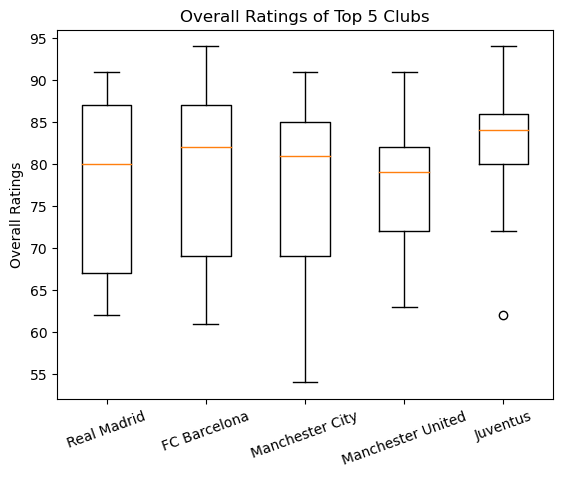

In [78]:
labels = ['Real Madrid', 'FC Barcelona', 'Manchester City', 'Manchester United', 'Juventus']
plt.boxplot([madrid, barclona, manch_C, manc_U, juventus],labels=labels,)
plt.title('Overall Ratings of Top 5 Clubs')
plt.ylabel('Overall Ratings')
plt.xticks(rotation =20)
plt.show()